In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp
import sys
import importlib
import os
sys.path.append(os.getcwd() + "/..")

from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

importlib.reload(sys.modules['Plotters'])
importlib.reload(sys.modules['Broth_model'])
importlib.reload(sys.modules['Plaque_model'])

<module 'Plaque_model' from '/Users/dhm160/Documents/GitHub/Masters-thesis/ResubPlots/../Plaque_model.py'>

# Figure 2

## A

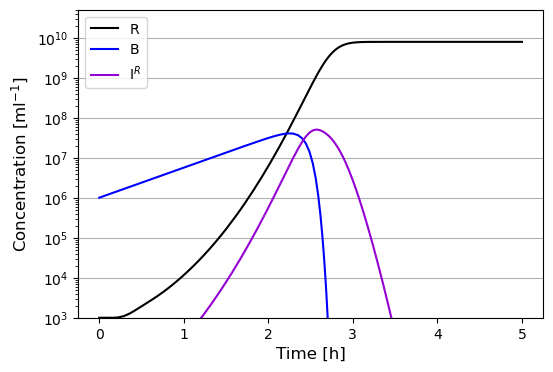

In [79]:
#Fetch default parameter values 
V = DV() 
model = "M0"

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10 #Example

#Fetch initial values 
y0 = IV(model)

#Set simulation length (mins)
t = 15*V.tau0

#Run simulation
M0sol = solve_ivp(M0,[0,t],y0,args = Const(V,model))

#Plot
BrothPlotter(model,V,M0sol.t,M0sol.y, scale = "log",figtitle = "Fig2A",plotn = False,ylim = (1e3,5e10),figsize = (6,4))

## B

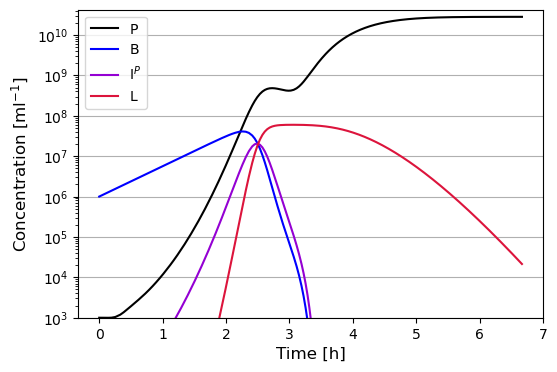

In [80]:
#Fetch default parameter values 
V = DV() 

#Option to change parameter values (see Initial_values.py)
V.f_tau,V.f_beta = 5,5

#Fetch initial values 
y0 = IV("M1")

#Set simulation length (mins)
t = 20*V.tau0

#Run simulation
M1sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))

#Plot
BrothPlotter("M1",V,M1sol.t,M1sol.y, scale = "log",figtitle = "Fig2B",plotn=False,figsize = (6,4))

## C

In [19]:
V = DV()

side        = 19
ratarrM0M1  = np.zeros((side,side))
ftauarr     = np.linspace(1,10,side)
fbetaarr    = np.linspace(1,10,side)

#Initial values
y00         = IV("M0",comp = 0)
y00[-2]     = 10**3
y10         = IV("M1",comp = 0)
y10[-2]     = 10**3

t = 20*60 #Simulate for long, to account for the longest values of f_tau

for it,ftau in enumerate(tqdm(ftauarr)):
    for ib,fbeta in enumerate(ftauarr):
        V.f_tau = ftau
        V.f_beta = fbeta
        sol0 = solve_ivp(M0,[0,t],y00,args = Const(V,"M0"))
        sol1 = solve_ivp(M1,[0,t],y10,args = Const(V,"M1"))
        ratarrM0M1[ib,it] = sol1.y[-2,-1]/sol0.y[-2,-1]

#np.savetxt(os.getcwd + 'ratarrM0M1.csv', ratarrM0M1, delimiter=',') #This is the data for the heatmap

100%|██████████| 19/19 [03:30<00:00, 11.08s/it]


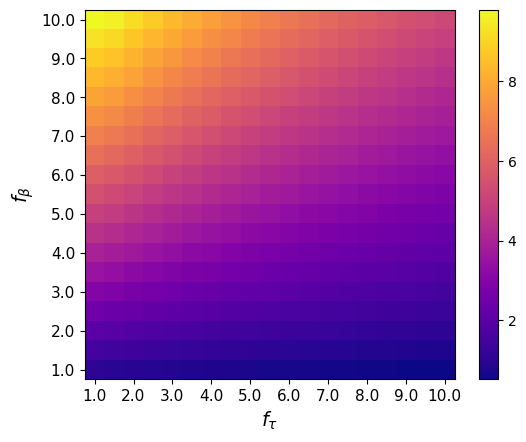

In [91]:
heatmap = plt.imshow(ratarrM0M1,origin="lower",cmap="plasma")
plt.colorbar(heatmap)
plt.xticks(np.arange(20,step=2), ftauarr[::2],fontsize = 11)
plt.yticks(np.arange(20,step=2), fbetaarr[::2],fontsize = 11)
plt.xlabel(r"$f_{\tau}$",fontsize= 14)
plt.ylabel(r"$f_{\beta}$",fontsize= 14)
#contours = plt.contour(ratarrM0M1, levels=[1], colors='black', linestyles='dashed')
plt.savefig("Fig2C")
#plt.clabel(contours, inline=True, fontsize=8, fmt='Equal')
plt.show()

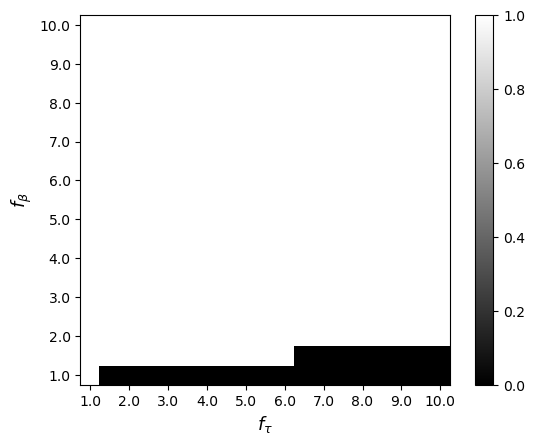

In [88]:
#To draw contourline between area where r-mutant dominates and where WT dominates
binary = np.where(ratarrM0M1 > 1,1,0)
plt.imshow(binary,origin="lower",cmap="gray")
plt.colorbar()
plt.xticks(np.arange(20,step=2), ftauarr[::2])
plt.yticks(np.arange(20,step=2), fbetaarr[::2])
plt.xlabel(r"$f_{\tau}$",fontsize= "13")
plt.ylabel(r"$f_{\beta}$",fontsize= "13")
#contours = plt.contour(ratarrM0M1, levels=[1], colors='black', linestyles='dashed')
plt.savefig("Fig2C")
#plt.clabel(contours, inline=True, fontsize=8, fmt='Equal')
plt.show()

# Figure 3

## A

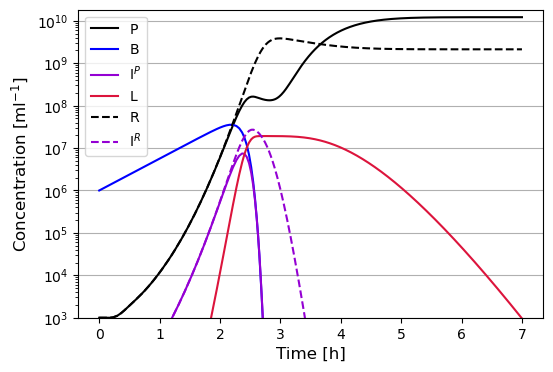

In [95]:
#Competition between wild type and r-mutant

V2 = DV() #Default values
V2.comp = 1 #Competition version
V2.f_beta, V2.f_tau = 5,5

#Intial values
y0 = IV("M1",comp = V2.comp)

#Simulation length (mins)
t = 7*60 

M1Csol = solve_ivp(M1,[0,t],y0,args = Const(V2,"M1"))
BrothPlotter("M1",V2,M1Csol.t,M1Csol.y,figtitle = "Fig3A",plotn = False,figsize = (6,4),)
#plt.ylim(1e3,5e10)

## B

In [22]:
V = DV()
V.comp = 1

side = 19
ratarrcomp = np.zeros((side,side)) #Figure data goes here
ftauarr = np.linspace(1,10,side)
fbetaarr = np.linspace(1,10,side)

#Initial values
y0 = IV("M1",comp = V.comp)
y0[-2] = 10**3
y0[-3] = 10**3

t = 20*60
for it,ftau in enumerate(tqdm(ftauarr)):
    for ib,fbeta in enumerate(ftauarr):
        V.f_tau = ftau
        V.f_beta = fbeta
        sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))
        ratarrcomp[ib,it] = sol.y[-2,-1]/sol.y[-3,-1]


100%|██████████| 19/19 [02:07<00:00,  6.72s/it]


In [16]:
heatmap = plt.imshow(ratarrcomp,origin="lower",cmap="plasma")
plt.colorbar(heatmap)
plt.xticks(np.arange(20,step=2), ftauarr[::2],fontsize = 11)
plt.yticks(np.arange(20,step=2), fbetaarr[::2],fontsize = 11)
plt.xlabel(r"$f_{\tau}$",fontsize= 14)
plt.ylabel(r"$f_{\beta}$",fontsize= 14)
plt.savefig("Fig3B.png")
#contours = plt.contour(ratarrcomp, levels=[1], colors='black', linestyles='dashed')
#plt.clabel(contours, inline=True, fontsize=8, fmt='Equal')
plt.show()

NameError: name 'ratarrcomp' is not defined

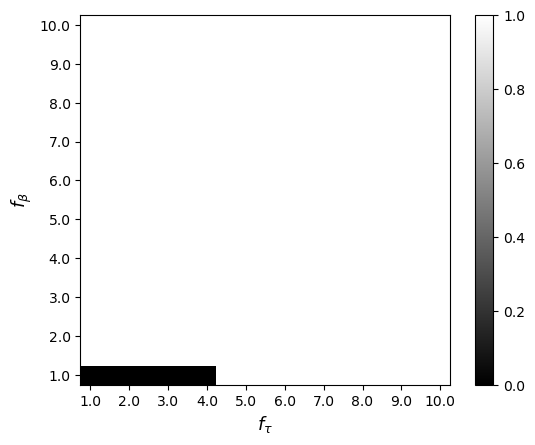

In [92]:
#To draw contourline between area where r-mutant dominates and where WT dominates
binary = np.where(ratarrcomp > 1,1,0)
plt.imshow(binary,origin="lower",cmap="gray")
plt.colorbar()
plt.xticks(np.arange(20,step=2), ftauarr[::2])
plt.yticks(np.arange(20,step=2), fbetaarr[::2])
plt.xlabel(r"$f_{\tau}$",fontsize= "13")
plt.ylabel(r"$f_{\beta}$",fontsize= "13")
#contours = plt.contour(ratarrM0M1, levels=[1], colors='black', linestyles='dashed')
plt.savefig("Fig2C")
#plt.clabel(contours, inline=True, fontsize=8, fmt='Equal')
plt.show()

# Figure 4

## A

In [5]:
from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

In [6]:
#r-mutant plaque

VR              = DVS(Rmax = 2*10**3,dr = 5) #Default values
y0R             = IVS("MP0",VR) #Intial values
t               = 5*60 #Simulation time
simR,savetimes  = MPShell("MP0",y0R,VR,t)


 18%|█▊        | 331906/1800000 [00:13<01:01, 23967.30it/s]


KeyboardInterrupt: 

In [ ]:
PlaquePlotter(simR,savetimes,VR,t,"MP0",Btot=True,figtitle="Fig4A")

NameError: name 'PlaquePlotter' is not defined

In [ ]:
#GifGenerator(simR,savetimes,VR,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

100%|██████████| 1800000/1800000 [02:51<00:00, 10475.02it/s]


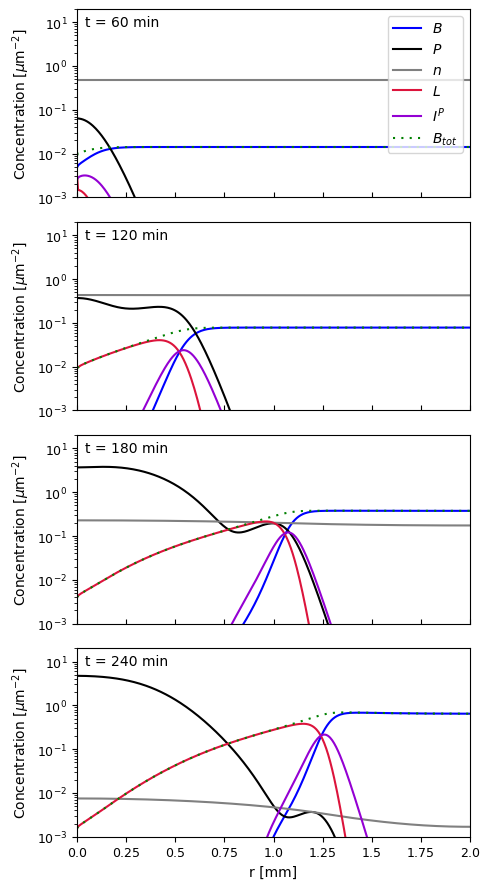

In [ ]:
#r-mutant plaque

VP                  = DVS(Rmax=2*10**3,dr = 5) #Default values
VP.f_tau,VP.f_beta  = 5,5
y0P                 = IVS("MP1",VP) #Intial values
t                   = 5*60 #Simulation time
simP,savetimes      = MPShell("MP1",y0P,VP,t)

## B

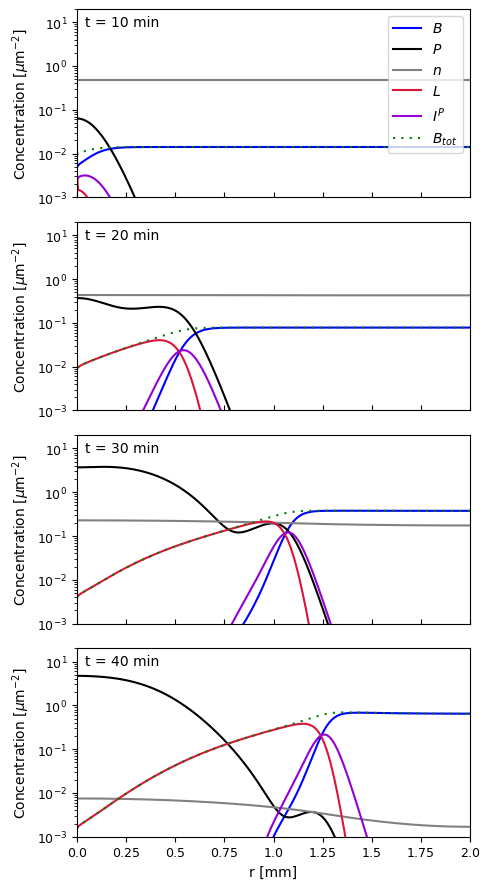

In [ ]:
PlaquePlotter(simP,savetimes,VP,t,"MP1",Btot=True,figtitle = "Fig4B")

In [ ]:
#GifGenerator(simP,savetimes,VP,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

## C

In [7]:
#r-mutant plaque

VR2              = DVS(Rmax = 2*10**3,dr = 5) #Default values
y0R2             = IVS("MP0",VR2) #Intial values
t                = 5*60 #Simulation time
simR2,savetimes  = MPShell("MP0",y0R2,VR2,t,save_interval=10)

100%|██████████| 1800000/1800000 [01:17<00:00, 23112.87it/s]


In [8]:
#Wild-type plaque

VP2                  = DVS(Rmax = 2*10**3,dr = 5) #Default values
VP2.f_beta,VP2.f_tau = 5,5
y0P2                 = IVS("MP1",VP2) #Intial values
simP2,savetimes      = MPShell("MP1",y0P2,VP2,t,save_interval=10)

100%|██████████| 1800000/1800000 [02:50<00:00, 10537.91it/s]


In [9]:
Pdetarr = Pdet(simR2,VR2,y0R2[0,0])
tarr = np.linspace(0,t,len(simR2))
rhalfarr = rhalf(simR2,False,VR2, var = "Btot")
Pfrontarr = Pfront(simR2,VR2)
ZOIarr = rhalf(simR2,False,VR2,var = "B")
rsuperarr = rsuper(simR2,False,VR2)

tarr1 = np.linspace(0,t,len(simP2))
rhalfarr1 = rhalf(simP2,True,VP2,var = "Btot")
Pfrontarr1 = Pfront(simP2,VP2,LIN = True)
ZOIarr1 = rhalf(simP2,True,VP2,var = "B")
Pdetarr1 = Pdet(simP2,VP2,y0P2[0,0])
rsuperarr1 = rsuper(simP2,True,VP2)


In [10]:
#vrhalf = (rhalfarr[1:]-rhalfarr[:-1])/(tarr[1]-tarr[0])
#vPfront = (Pfrontarr[1:]-Pfrontarr[:-1])/(tarr[1]-tarr[0])
#vZOI = (ZOIarr[1:]-ZOIarr[:-1])/(tarr[1]-tarr[0])
#vrsuper = (rsuperarr[1:]-rsuperarr[:-1])/(tarr[1]-tarr[0])
#vPdet = (Pdetarr[1:]-Pdetarr[:-1])/(tarr[1]-tarr[0])
#vrhalf1 = (rhalfarr1[1:]-rhalfarr1[:-1])/(tarr[1]-tarr[0])
#vPfront1 = (Pfrontarr1[1:]-Pfrontarr1[:-1])/(tarr[1]-tarr[0])
#vZOI1 = (ZOIarr1[1:]-ZOIarr1[:-1])/(tarr[1]-tarr[0])
#vrsuper1 = (rsuperarr1[1:]-rsuperarr1[:-1])/(tarr[1]-tarr[0])
#vPdet1 = (Pdetarr1[1:]-Pdetarr1[:-1])/(tarr[1]-tarr[0])

In [11]:
#for i,v in enumerate(vrsuper):
#    if v >= max(vrsuper)*0.8:
#        expansionstart = tarr[i]
#        break
#for i,v in enumerate(vrsuper[::-1]):
#    if v >= max(vrsuper)*0.85:
#        expansionend = tarr[-i-2]
#        break
#expansionstart,expansionend
#
#for i,v in enumerate(vrsuper1):
#    if v >= max(vrsuper1)*0.8:
#        expansionstart1 = tarr[i]
#        break
#for i,v in enumerate(vrsuper1[::-1]):
#    if v >= max(vrsuper1)*0.85:
#        expansionend1 = tarr[-i-2]
#        break
#expansionstart1,expansionend1

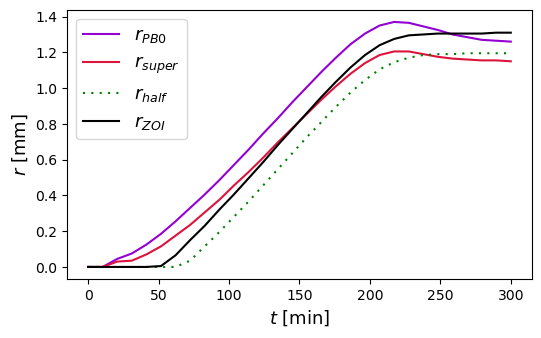

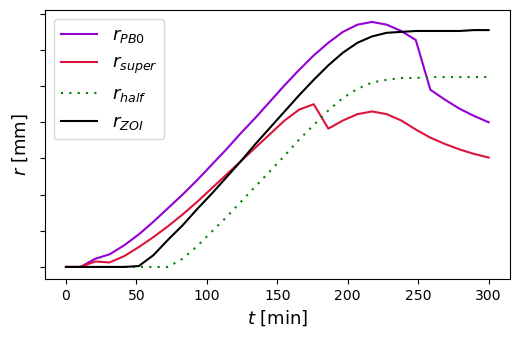

In [15]:
plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]",fontsize = 13)
plt.ylabel(r"$r$ [mm]",fontsize = 13)
plt.legend(fontsize = 13)
plt.savefig("Fig4C.jpg",bbox_inches = "tight")
#plt.title("MP0")

plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr1,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr1,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr1,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr1,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]",fontsize = 13)
plt.ylabel(r"$r$ [mm]",fontsize = 13)
plt.legend(fontsize = 13)
plt.savefig("Fig4D.jpg",bbox_inches = "tight")
plt.yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4],[None,None,None,None,None,None,None,None])
#plt.title("MP1")
plt.show()